**Overview**

*   Yulu is India's leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

*   Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!


**Problem Statement**

Yulu has recently suffered considerable dips in its revenues. Yulu have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, **Yulu want to understand the factors affecting the demand for these shared electric cycles in the Indian market.**

What are the factors affecting Yulu's revenues and on what factors the demand of these electric bikes depends in the Indian market.

**Objective**

Our objective is to analyse the given dataset and generate insights based on followings:

*	  Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

*	  How well those variables describe the electric cycle demands.

*   Relationship between the dependent and independent variables.


**Dataset :** We will be using this dataset "yulu_bike_sharing.csv" throughout this casestudy and try to findout useful insights.

In [ ]:
#Importing required Libaries
import numpy as np #For basic mathematical operations
import pandas as pd #For data analysis
import matplotlib.pyplot as plt #For data visulatisation
import seaborn as sns #For data visulatisation

In [ ]:
#Reading the CSV file
df = pd.read_csv("yulu_bike_sharing.csv")

In [ ]:
#Checking few records
df.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
951,2011-03-04 02:00:00,1,0,1,2,7.38,9.090,64,12.9980,0,2,2
2822,2011-07-06 12:00:00,3,0,1,2,30.34,34.850,66,6.0032,38,114,152
134,2011-01-06 20:00:00,1,0,1,1,8.20,10.605,51,11.0014,3,66,69
4009,2011-09-18 02:00:00,3,0,0,1,18.04,21.970,82,16.9979,21,68,89
484,2011-02-03 07:00:00,1,0,1,1,5.74,6.060,50,22.0028,1,86,87


* 	Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary

**Shape of the dataset** : There are 10886 rows and 12 columns

In [ ]:
df.shape #shape function in pandas returns the number of rows and columns present in the dataset

(10886, 12)

**Dimension of the dataset**

This dateset is of two-dimensional(2D)

In [ ]:
df.ndim #data.ndim wil tell us that how many dimension is the dataset of

2

**Data types of all the attributes**

*   In this dataset datetime is of dtype object(string) whereas temp, atemp, windspeed are of dtype float and rest of the columns are of dtype int.

In [ ]:
df.info() #info function in pandas returns the shape, data types, number of non null values present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


We can see that column **datetime** is of dtype object but in general the dtype of datetime column should of type datetime. Let us convert the dtype of datetime from object to datetime.

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime']) #converting the datetime column from object to datetime using to_datetime function
df['datetime'].dtypes #dtype got changed to datetime format

dtype('<M8[ns]')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


Let us understand each columns and what each of their value represents.

**Column Profiling:**
*  	**datetime**: Date and time when the bike is booked.
*  	**season**: What was the season when booked denoted by 1,2,3 and 4.

    **1:** spring

    **2:** summer

    **3:** fall
    
    **4:** winter
* 	**holiday**: Represents whether the day is a holiday or not, 1 if it's a holiday else 0.
*  	**workingday**: If the day is neither weekend nor holiday then the value is 1, otherwise the value is 0.
* 	**weather**: How was the weather that time denoted by 1,2,3 and 4.

    **1:** Clear, Few clouds, partly cloudy, partly cloudy

    **2:** Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

    **3:** Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

    **4:** Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

* 	**temp:** Temperature in Celsius
* 	**atemp:** Feeling temperature in Celsius
* 	**humidity:** How was the humidity
* 	**windspeed:** Represents wind speed
* 	**casual:** Count of casual users booked the bike
* 	**registered:** Count of registered users booked the bike
* 	**count:** Count of total rental bikes including both casual and registered users.


**Conversion of categorical attributes to 'category'**

Here conversion of categorical attributes to 'category' is not required as all the Dataset is in proper shape.

**Missing value detection**

There are zero missing/Null value present in the dataset. We can use the below commands to check the missing values.

In [ ]:
df.isna() #isna function checks each record and returns True if any value is missing else False

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,False,False,False,False,False,False,False,False,False,False,False,False
10882,False,False,False,False,False,False,False,False,False,False,False,False
10883,False,False,False,False,False,False,False,False,False,False,False,False
10884,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum() #isna.sum() returns the total missing value count of each columns

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [ ]:
df.isna().sum().sum() #isna.sum().sum() returns the total missing value count present in the dataset

np.int64(0)

**Statistical summary**

Observations from the below output:
*   Data available in this dataset is from 2011-01-01 to 2012-12-19.
*   Min, max and mean temperature observed are 0.8, 41.0 and 20.2 degree Centigrade.
*   Whereas Min, max and mean feels like temperature observed are 0.7, 45.4 and 23.6 degree Centigrade.
*   Min, max and mean humidity measured are 0, 100 are 61.8
*   Min, max and mean wind speed seen are 0, 56.9 are 12.79 assuming the unit as KM/H(kilometer per hour).
*   Average casual customer booking is 36.
*   Whereas average registered customer booking is 155.55
*   Total average booking 191.5

In [ ]:
df.describe() #describe function returns the count, mean, min,  25%, 50%, 75%, max and standard deviation of all the numerical attributes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


**Useful insights from the above observations:**
*   There are 10886 rows and 12 columns present in the dataset.
*   There are zero missing/Null value present in the dataset.
*   Data available in this dataset is from 2011-01-01 to 2012-12-19.
*   Min, max and mean temperature observed are 0.8, 41.0 and 20.2 degree Centigrade.
*   Min, max and mean humidity measured are 0, 100 are 61.8
*   Min, max and mean wind speed seen are 0, 56.9 are 12.79 assuming the unit as KM/H(kilometer per hour).

**Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)**

Before we start on visual analysis, data should be in the correct format for us to use it as the input. This preparation of the data by identifying and resolving the potential errors, inaccuracies, and inconsistencies is termed as Data Cleaning.

    1: Identifying and resolving the potential errors:
    2: Identifying inaccuracies:
    3: Identifying inconsistencies:

**Univariate data:**

Univariate data refers to a type of data in which each observation or data point corresponds to a single variable. In other words, it involves the measurement or observation of a single characteristic or attribute for each individual or item in the dataset. Analysing univariate data is the simplest form of analysis in statistics.

**Distplot:** is designed to visualize the distribution of a univariate set of observations, meaning it takes a series of data points from a single variable and displays their distribution. The function combines the histogram plotting capabilities of Matplotlib with Seaborn's kernel density estimation (KDE) and rugplot features.

In [ ]:
#To hide the warnings we are using the below code
import warnings
warnings.filterwarnings('ignore')

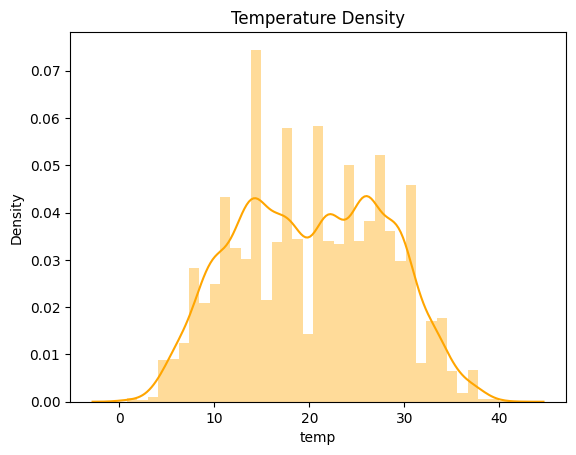

In [ ]:
#Here we are using distplot to analyse the 'temp' column
plt.title("Temperature Density")
sns.distplot(df['temp'],color='orange')
plt.show()

From the above Temperature Distribution plot we can see that data is concentrated from 15 to 25 degree celcius.

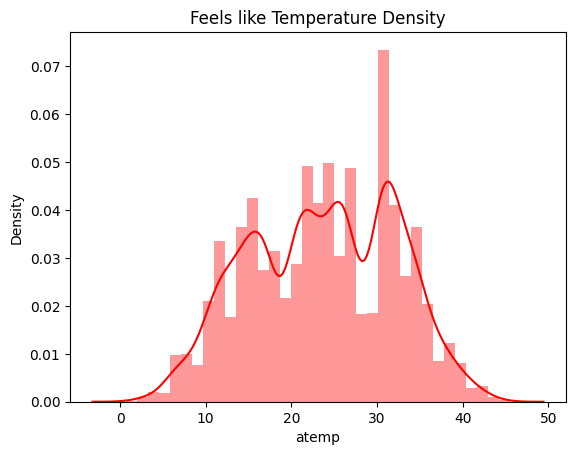

In [ ]:
#Here we are using distplot to analyse the 'atemp' column
plt.title("Feels like Temperature Density")
sns.distplot(df['atemp'],color='red')
plt.show()

Whereas from the above feels like temperature we can see the mean is between 20-30 degree celcius.

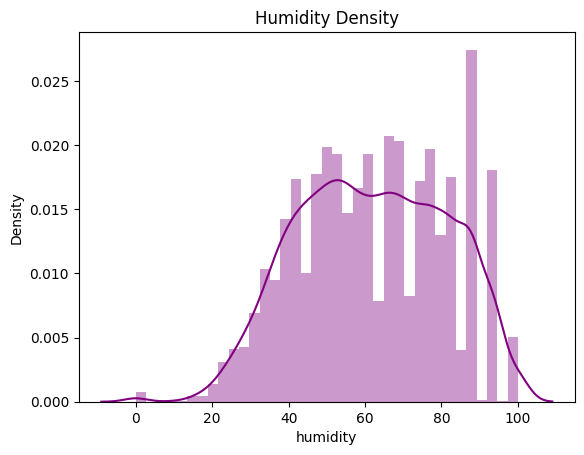

In [ ]:
#Here we are using distplot to analyse the 'Humildity' column
plt.title("Humidity Density")
sns.distplot(df['humidity'],color='purple')
plt.show()

Looking at the above Humidity distribution plot the graph is left skewed and the mean lies in the range of 55-65.

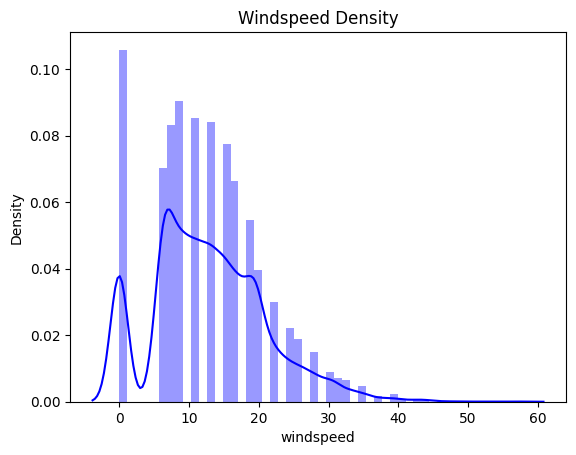

In [ ]:
#Here we are using distplot to analyse the 'windspeed' column
plt.title("Windspeed Density")
sns.distplot(df['windspeed'],color='blue')
plt.show()

The above windspeed distribution graph looks somewhat right skewed where the means lies between 5-15 Km/h.

**Countplot:** method is used to Show the counts of observations in each categorical bin using bars.

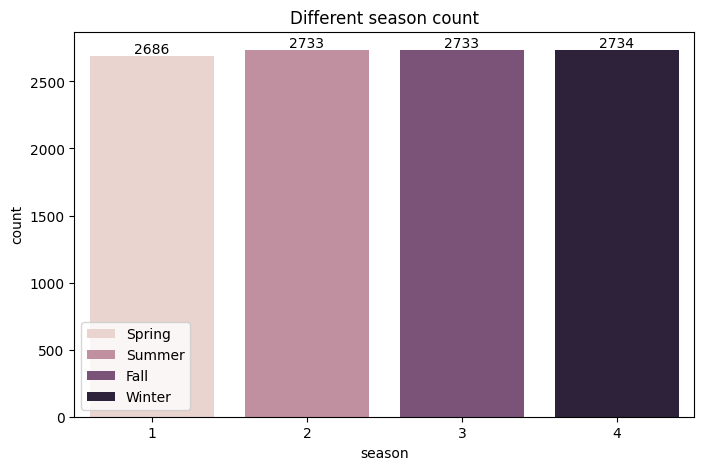

In [ ]:
#Here we are using countplot to analyse the 'season' column
plt.figure(figsize=(8,5))
plt.title("Different season count")
ax = sns.countplot(x='season',hue='season',data=df) #plotting countplot
ax.legend(["Spring","Summer","Fall","Winter"])

for i in ax.containers:
  ax.bar_label(i,)

plt.show()

From the above Different season countplot we can see that number of records for all the seasons are almost same.

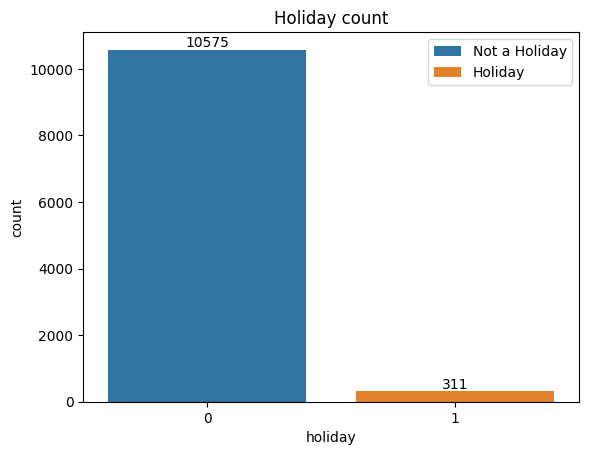

In [ ]:
#Here we are using countplot to analyse the 'holiday' column

plt.title("Holiday count")
ax = sns.countplot(x='holiday',hue='holiday',data=df) #plotting countplot
ax.legend(["Not a Holiday","Holiday"])

for i in ax.containers:
  ax.bar_label(i,)

plt.show()

From the above holiday countplot we can see that there are 311 holiday records and 10575 non holiday record present in the dataset.

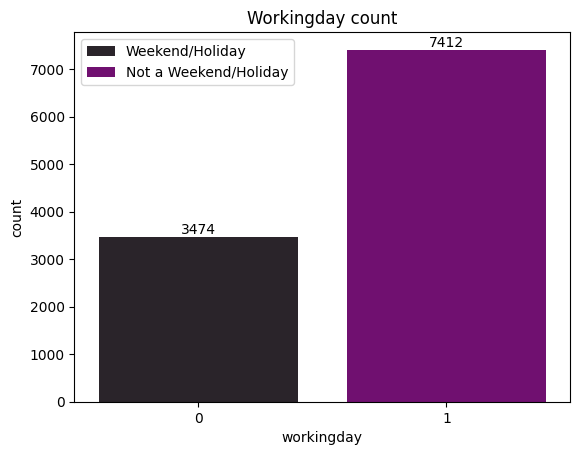

In [ ]:
#Here we are using countplot to analyse the 'workingday' column

plt.title("Workingday count")
ax = sns.countplot(x='workingday',hue='workingday',data=df,color="purple") #plotting countplot
ax.legend(["Weekend/Holiday","Not a Weekend/Holiday"])

for i in ax.containers:
  ax.bar_label(i,)

plt.show()

From the above working day countplot we can see that there are 3474 weekend/holiday records and 7412 non weekend/holiday record present in the dataset.

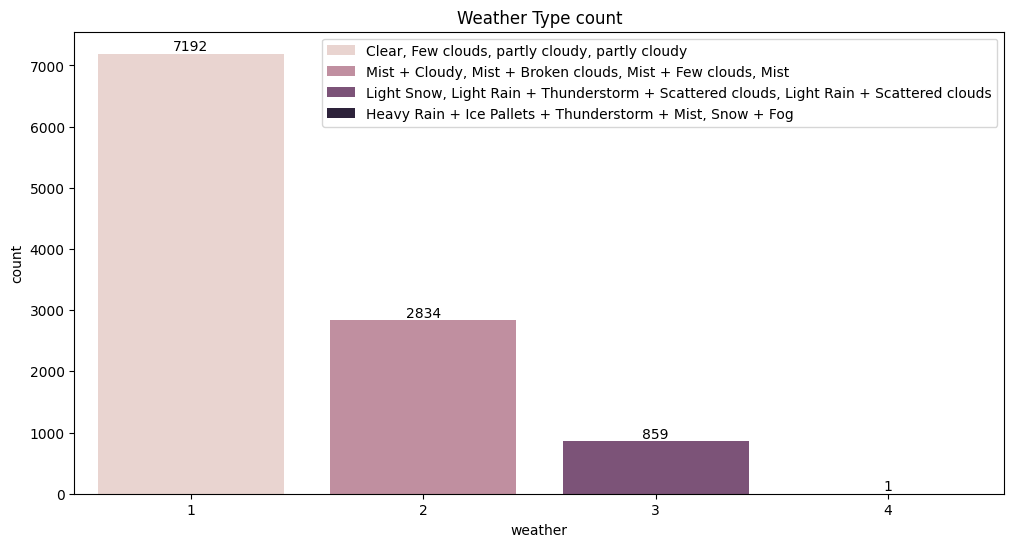

In [ ]:
#Here we are using countplot to analyse the 'weather' column
plt.figure(figsize=(12,6))
plt.title("Weather Type count")
ax = sns.countplot(x='weather',hue='weather',data=df) #plotting countplot
ax.legend(["Clear, Few clouds, partly cloudy, partly cloudy","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
           "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"])

for i in ax.containers:
  ax.bar_label(i,)

plt.show()

From the weather countplot we can conclude that most of booking are done when the weather was "Clear, Few clouds, partly cloudy, partly cloudy".

**Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count).**

**Bivariate data:** Bivariate data involves two different variables, and the analysis of this type of data focuses on understanding the relationship or association between these two variables.

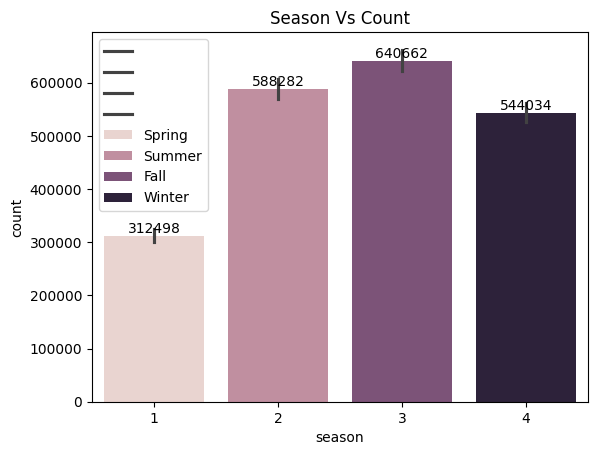

In [ ]:
#Here we are using barplot to analyse the 'season' and 'count' column

plt.title("Season Vs Count")
ax = sns.barplot(x='season',hue='season',y='count',data=df,estimator = np.sum) #plotting barplot
ax.legend(["","","","","Spring","Summer","Fall","Winter"])

for i in ax.containers:
  ax.bar_label(i,)

plt.show()

From the above Season vs Count barplot we can see that maximun number of bookings are done in the Fall season(September, October, and November).

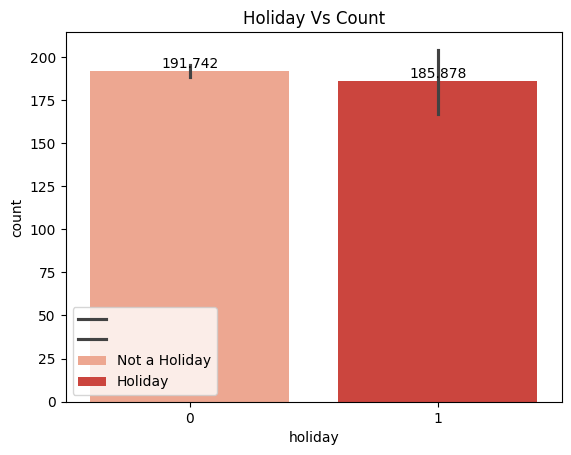

In [ ]:
#Here we are using barplot to analyse the 'holiday' and 'count' column

plt.title("Holiday Vs Count")
ax = sns.barplot(x='holiday',y='count',data=df,palette = "Reds") #plotting barplot
ax.legend(["","","Not a Holiday","Holiday"])

for i in ax.containers:
  ax.bar_label(i,)

plt.show()

Since there is more records for non Holiday so we have taken mean and we can still see that on avergae on non holiday booking rate is slightly high.

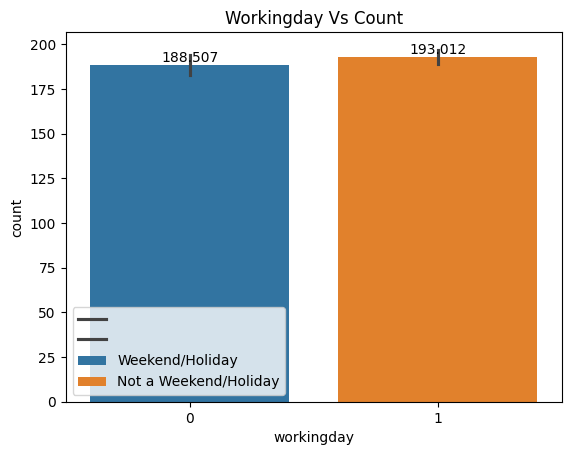

In [ ]:
#Here we are using barplot to analyse the 'workingday' and 'count' column

plt.title("Workingday Vs Count")
ax = sns.barplot(x='workingday',y='count',data=df,hue='workingday') #plotting barplot
ax.legend(["","","Weekend/Holiday","Not a Weekend/Holiday"])

for i in ax.containers:
  ax.bar_label(i,)

plt.show()

Since there is more records for not weekend/Holiday so we have taken mean and we can still see that on avergae on non weekend/holiday booking rate is slightly high.

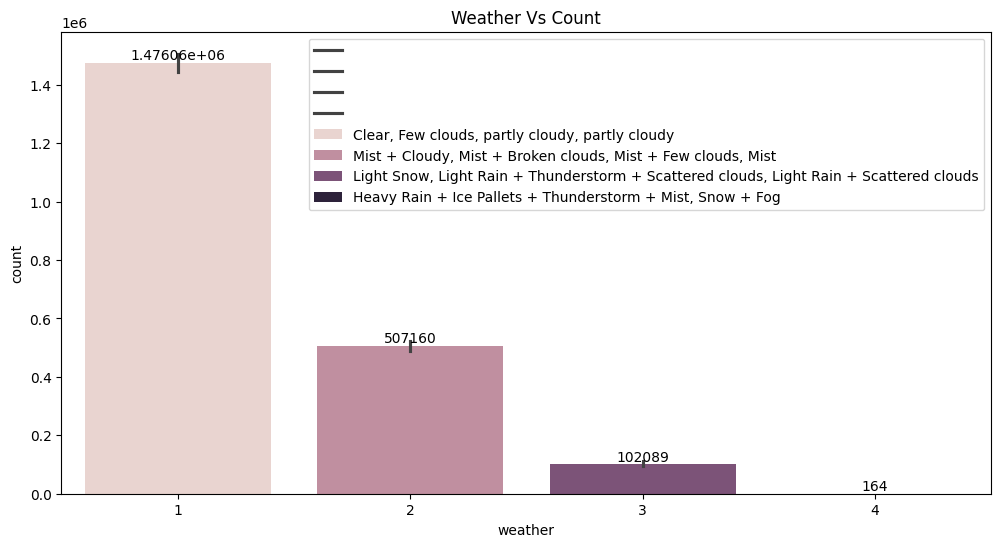

In [ ]:
#Here we are using barplot to analyse the 'weather' and 'count' column
plt.figure(figsize=(12,6))
plt.title("Weather Vs Count")
ax = sns.barplot(x='weather',y='count',data=df,hue='weather',estimator = np.sum) #plotting barplot
ax.legend(["","","","","Clear, Few clouds, partly cloudy, partly cloudy","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
           "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"])

for i in ax.containers:
  ax.bar_label(i,)

plt.show()

Majority of the booking was done during "Clear, Few clouds, partly cloudy, partly cloudy" weather conditons.

**Illustrate the insights based on EDA**

**Comments on range of attributes, outliers of various attributes**

* datetime column has start date of 2011-01-01 and end date of 2012-12-19. This dateset contains 718 days of records.
* Season ranges from 1 to 4 where 1,2,3 and 4 are treated as category. Below represents the categories of the numbers.

    1: spring

    2: summer

    3: fall

    4: winter

*   holiday column has two categories 0(Not a holiday) and 1(Holiday).
*   For workingday column it ranges from 0 and 1 if day is neither weekend nor holiday is 1, otherwise is 0.
*  	weather ranges from 1-4 where the number represents the below categories:

    1: Clear, Few clouds, partly cloudy, partly cloudy

    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

*  temp ranges from 0.8 to 41.0 with an average of 20.2 celcius.
*  Whereas feels like temperature ranges from 0.76 to 45.4 with an average of 23.65 celcius.
*  humidity ranges from 0 to 100 with an average of 61.8.
*  windspeed ranges from 12.79 to 56.9 with an average of 12.7 Km/H.
*  count column ranges from 1 to 977 with an average of 191.5

**Outlier check:** When exploring data, the outliers are the extreme values within the dataset. That means the outlier data points vary greatly from the expected values - either being much larger or significantly smaller.

In [ ]:
df.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


With the describe method of pandas, we can see our data's Q1 (%25) and Q3 (%75) percentiles.

We can calculate our IQR point and boundaries once the upper boundary and lower boundary is calculated. This means that these values between lower and upper boundary are acceptable but those outside mean are outliers.

**Outliers for this dataset:**

We will use boxplot to detect the outliers.

**Boxplot:** is the visual representation of the groups of numerical data through their quartiles. Boxplot is also used to detect the outlier in data set. It summarizes a sample data using 25th, 50th and 75th percentiles. These percentiles are also known as the lower, median & upper quartile.

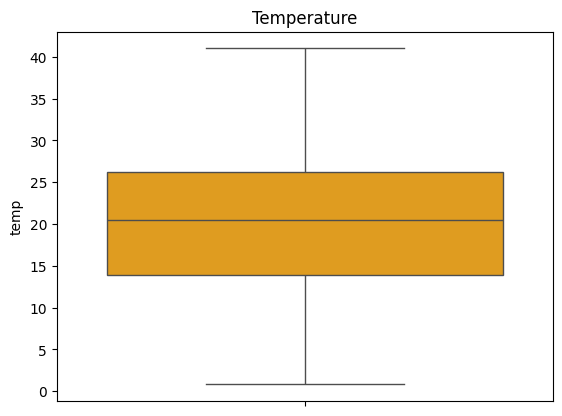

In [ ]:
sns.boxplot(df['temp'],color='orange') #we are ploting boxplot for 'temp' Column
plt.title("Temperature")
plt.show()

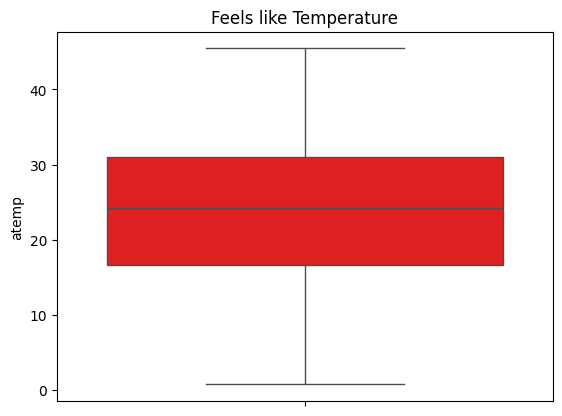

In [ ]:
sns.boxplot(df['atemp'],color='red') #we are ploting boxplot for 'atemp' Column
plt.title("Feels like Temperature")
plt.show()

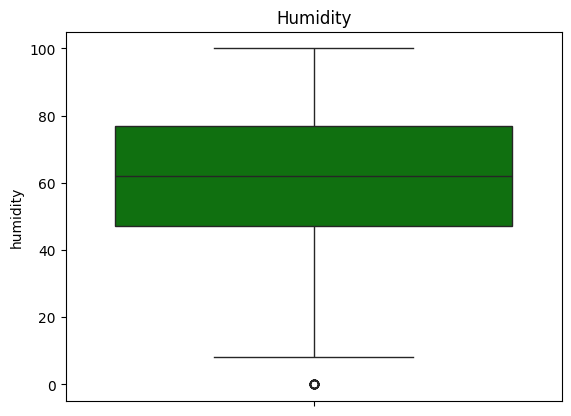

In [ ]:
sns.boxplot(df['humidity'],color='green') #we are ploting boxplot for 'humidity' Column
plt.title("Humidity")
plt.show()

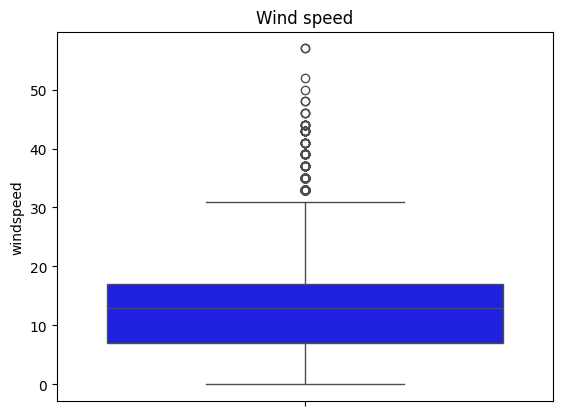

In [ ]:
sns.boxplot(df['windspeed'],color='blue') #we are ploting boxplot for 'windspeed' Column
plt.title("Wind speed")
plt.show()

**Treating Outliers:**

As we can the outliers (as shown at boxplot). Boxplot is the best way to see outliers. Before handling outliers, we will detect them. We will use Tukey's rule to detect outliers. It is also known as the IQR rule.

First, we will calculate the Interquartile Range of the data

(IQR = Q3 — Q1). Later, we will determine our outlier boundaries with IQR.

We will get our lower boundary with this calculation Q1-1.5 * IQR.

We will get our upper boundary with this calculation Q3 + 1.5 * IQR.

According to this rule, the data between boundaries are acceptable but the data outside of the between lower and upper boundaries are outliers. We can use 2.5 or 2 to detect IQR. It depends on our data and analysis. But the most commonly used is 1.5 and we will use 1.5 IQR in this analysis.

From the above boxplots we can see the columns 'temp' and 'atemp' have no outliers.

Let us take the column 'humidity' and calculate the outlier.

*   windspeed

Q1: 7.00

Q3: 16.99

IQR=Q3-Q1=9.99

Lower limit = Q1-1.5*IQR=-7.98(But windspeed can't be negative so we will consider 0)

Upper limit= Q3+1.5*IQR=31.97

*   humidity

Q1: 47.00

Q3: 77.00

IQR=Q3-Q1=30

Lower limit = Q1-1.5*IQR=-2(But humidity can't be negative so we will consider 0)

Upper limit= Q3+1.5*IQR=122

From the above calculations we can conclude that:

*   For windspeed column any value outside the range -7.98 to 31.97 can be treated as outliers.
*   For humidity column any value outside the range -2 to 122 can be treated as outliers.

Dropping Outliners is one of the method used in the treatment of outliners for effective data:

We can easily remove outliers, but this narrows our data. If we have a lot of rows, big data, maybe we can take risks. But remember, if we drop the value, we delete all records (row). If we have vulnerable records, they can get lost.

**Comments on the distribution of the variables and relationship between them**

<Axes: >

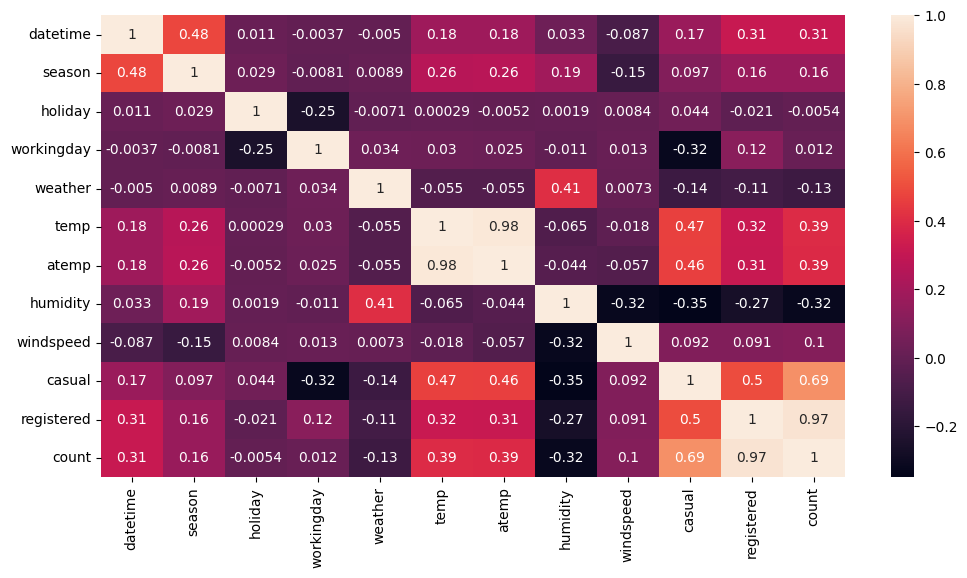

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True) #plotting heatmap using .corr() function

*   datetime - This dataset contains the record from 2011-01-01 to 2012-12-19.
*   season - There is four season present the dataset denoted by 1(spring), 2(summer), 3(fall) and 4(winter).
*   holiday - This attribute have two categories denoted by 0(Not a Holiday) and 1(Holiday).
*   workingday - This varible also have two categories denote by 0(Weekend/Holiday) and 1(Not Holiday/Weekend).
*   temp - This column ranges from 0.8 to 41 degree celcius.
*   atemp - This column ranges from 0.7 to 45.45 degree celcius.
*   humidity - Humidity ranges from 0 to 100.
*   windspeed - Windspeed ranges from 0-57 Km/h.

From the above heatmap we can see that:

*   There is a correlation between humidity and weather.
*   There is strong correlation between temperature(temp) and feels like temperature(atemp) attribute.
*   Datetime and season is also correlated.

**Comments for each univariate and bivariate plots**

*   In Temperature Distribution plot data is concentrated from 15 to 25 degree celcius whereas feels like temperature mean lies in-between 20-30 degree celcius.
*   Humidity distribution plot the graph looks left skewed and the mean lies in the range of 55-65.
*   Windspeed distribution graph looks somewhat right skewed where the means lies between 5-15 Km/h
*   All the seasons have almost similar number of records.
*    There are 311 holiday records and 10575 non holiday records present in the dataset.
*   In general weekend/holiday < non weekend/holiday and from the countplot we can also see that there are 3474 weekend/holiday records and 7412 non weekend/holiday record present in the dataset.
*   Maximun number of bookings are done in the Fall season(September, October, and November). During these months weather used to be moderate.
*   On avergae for non holiday booking rate is slightly high as compared to holiday.
*   On avergae for non weekend/holiday booking rate is slightly high as compared to weekend/holiday.
*   Majority of the booking was done during "Clear, Few clouds, partly cloudy, partly cloudy" weather conditons.
*   Very few booking were done during the weather condition "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog".

**2.	Hypothesis Testing**

**2- Sample T-Test** to check if Working Day has an effect on the number of electric cycles rented

**2- Sample T-Test:** The two-sample t-test (also known as the independent samples t-test) is a method used to test whether the unknown population means of two groups are equal or not.

**Assumption:** We can use the test when our data values are independent, are randomly sampled from two normal populations and the two independent groups have equal variances.

Before doing the 2-sample T-test let us check if the data is normally distributed or not.

**We will use Shapiro test and qqplot for checking the normality and levene's test for homogeneity of variance.**

The **Shapiro-Wilk** test is a statistical test used to determine if a sample data set follows a normal distribution, with the null hypothesis being that the data is normally distributed. A low p-value suggests the data is not normally distributed, while a high p-value suggests it is.

Let us assume that:

Null Hypothesis(Ho) -> The data is normally distributed

Alternate Hypothesis(Ha) -> The data is not normally distrubuted

alpha = 0.05(95% confidence level)

In [ ]:
from scipy.stats import shapiro #importing shapiro library

data1 = df[df['workingday'] == 0]['count'].sample(100) #Taking 100 sample where the day is Holiday/Weekend
data2 = df[df['workingday'] == 1]['count'].sample(100) #Taking 100 sample where the day is not a Holiday/Weekend

In [ ]:
shapiro(data1) #performing shapiro test for Holiday/Weekend data

ShapiroResult(statistic=np.float64(0.8860089198262788), pvalue=np.float64(3.2884779302090024e-07))

For the Holiday/Weekend data we can see that the p-value is very very small which means p-value(0.000000328) < alpha(0.05) so we will reject our null Hypothesis.

**Holiday/Weekend data is not normally distributed.**

In [ ]:
shapiro(data2) #performing shapiro test for not a Holiday/Weekend data

ShapiroResult(statistic=np.float64(0.8676361236987253), pvalue=np.float64(5.634948087351622e-08))

For the not a Holiday/Weekend data also we can see that the p-value is very very small which means p-value(0.0000000563) < alpha(0.05) so we will reject our null Hypothesis.

**Not a Holiday/Weekend data is not normally distributed.**

**QQplot**: When the quantiles of two variables are plotted against each other, then the plot obtained is known as quantile - quantile plot or **qqplot**. This plot provides a summary of whether the distributions of two variables are similar or not with respect to the locations.

All point of quantiles lie on or close to straight line at an angle of 45 degree from x - axis. It indicates that two samples have similar distributions.

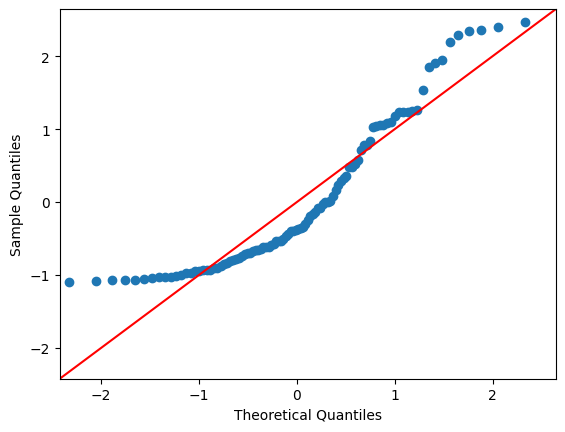

In [ ]:
import statsmodels.api as sm #importing required library for qqplot

sm.qqplot(data1,fit=True,line="45") #plotting qqplot for Holiday/Weekend data
plt.show()

We can see for Holiday/Weekend data the datapoints are not following the 45 degree straight line. So we can say that the data is not normally distributed.

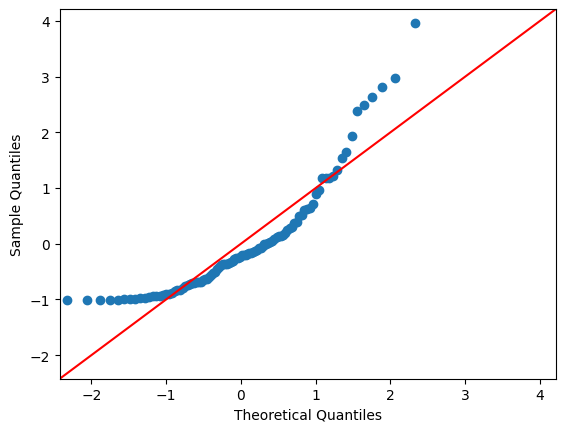

In [ ]:
sm.qqplot(data2,fit=True,line="45") #plotting qqplot for not a Holiday/Weekend data
plt.show()

We can see for not a Holiday/Weekend data also the datapoints are not following the 45 degree straight line. So we can say that the data is not normally distributed.

**Levene's test** is a statistical test used to assess the equality of variances (homogeneity of variance) across two or more groups, commonly used before performing t-tests or ANOVAs to ensure the assumptions of these tests are met

Let us assume that:

Null Hypothesis(Ho) -> The variance are same

Alternate Hypothesis(Ha) -> The variance are not same

alpha = 0.05(95% confidence level)

In [ ]:
from scipy.stats import levene #importing the levene library for the test

levene(data1,data2) #performing levene's test for Holiday/Weekend and not a Holiday/Weekend data

LeveneResult(statistic=np.float64(0.7293432976030008), pvalue=np.float64(0.3941281815101304))

Since the p-value(0.39) > alpha(0.05) means we fail to reject null hypothesis so from the levene's test we can conclude that the **variance of both the data are equal.**

Normality test failed but variance test is passed. Let's still perform the 2 sample T-test and observe the results

In [ ]:
data1.describe()

,count
count,100.000000
mean,196.820000
std,176.167183
min,2.000000
25%,43.250000
50%,138.500000
75%,335.500000
max,602.000000


In [ ]:
data2.describe()

,count
count,100.000000
mean,183.650000
std,178.538193
min,1.000000
25%,36.500000
50%,147.500000
75%,275.250000
max,868.000000


Let us assume that:

Null Hypothesis(Ho) -> The population mean of data1 and data2 are same

Alternate Hypothesis(Ha) -> The population mean of data1 and data2 are not same

alpha = 0.05(95% confidence level)

In [ ]:
from scipy.stats import ttest_ind #importing the library for two sample independent T-test

In [ ]:
ttest_ind(data2, data1) #performing independent t-test for Holiday/Weekend and not a Holiday/Weekend data

TtestResult(statistic=np.float64(-0.5250773680429645), pvalue=np.float64(0.6001168587622823), df=np.float64(198.0))

From the above T-test we can see that p-value(0.60) > alpha(0.05) so we fail to reject the null hypothesis which means **the population mean booking of Holiday/Weekend is same as not a Holiday/Weekend**.

Let's us also perform Kruskal-Wallis test which is independent upon assumptions.

**Kruskal-Wallis** test is a non-parametric equivalent of one-way ANOVA, used to determine if groups have the same median

Let us assume that:

Null Hypothesis(Ho) -> The population median of data1 and data2 are same

Alternate Hypothesis(Ha) -> The population median of data1 and data2 are not same

alpha = 0.05(95% confidence level)

In [ ]:
from scipy.stats import kruskal

kruskal(data1,data2) #performing kruskal test for Holiday/Weekend and not a Holiday/Weekend data

KruskalResult(statistic=np.float64(0.061509153327519675), pvalue=np.float64(0.8041263681907562))

From the above Kruskal-Wallis test we can see that p-value(0.80) > alpha(0.05) so we fail to reject the null hypothesis which means the population median of data1 = data2.

**From the above tests we can conclude that Working Day has no effect on the number of electric cycles rented.**

**ANNOVA to check if No. of cycles rented is similar or different in different**
1. weather

2. season

**One-Way ANOVA** ("analysis of variance") compares the means of two or more independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. One-Way ANOVA is a parametric test. This test is also known as: One-Factor ANOVA.

**Assumption:** We can use the test when our data values are independent, are randomly sampled from two or more normal populations and the two or more independent groups have equal variances.

**Weather**

Before doing the Anova test let us check if the data is normally distributed or not.

**We will use Shapiro test for checking the normality and levene's test for homogeneity of variance.**

In [ ]:
#Let us taking 100 samples for each weather category
data_w1 = df[df['weather'] == 1]['count'].sample(100) #Taking 100 samples for type "Clear, Few clouds, partly cloudy, partly cloudy"
data_w2 = df[df['weather'] == 2]['count'].sample(100) #Taking 100 samples for type "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
data_w3 = df[df['weather'] == 3]['count'].sample(100) #Taking 100 samples for type "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"
data_w4 = df[df['weather'] == 4]['count'] #There is only 1 record for type "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"

Shapiro-Wilk test

Let us assume that:

Null Hypothesis(Ho) -> The data is normally distributed

Alternate Hypothesis(Ha) -> The data is not normally distrubuted

alpha = 0.05(95% confidence level)

In [ ]:
shapiro(data_w1) #performing kruskal test for  weather category "Clear, Few clouds, partly cloudy, partly cloudy"

ShapiroResult(statistic=np.float64(0.9261007762062571), pvalue=np.float64(3.010654698893844e-05))

In [ ]:
shapiro(data_w2) #performing kruskal test for  weather category "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"

ShapiroResult(statistic=np.float64(0.8726682445796381), pvalue=np.float64(8.995733151678049e-08))

In [ ]:
shapiro(data_w3) #performing kruskal test for  weather category "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"

ShapiroResult(statistic=np.float64(0.7388354677546232), pvalue=np.float64(4.794030725277435e-12))

From the above Shapiro test for all the weather categories(1,2,3) p-values are very small which means p-values(0.0000301,0.0000000899,0.00000000000479) < alpha(0.05) so we will reject our null hypotheseis.

**For weather categories the data is not normally distributed.**

Levene's Test

Let us assume that:

Null Hypothesis(Ho) -> The variance are same

Alternate Hypothesis(Ha) -> The variance are not same

alpha = 0.05(95% confidence level)

In [ ]:
levene(data_w1,data_w2,data_w3,data_w4) #performing levene's test for different weather categories

LeveneResult(statistic=np.float64(5.7172582850386675), pvalue=np.float64(0.0008135384657588784))

We can see that p-value(0.00081) < alpha(0.05) so we will reject the null hypothesis. **For weather categories variance are not same.**

Normality and Variance test failed for Weather categories but still let us perform One-Way ANOVA test and analyse the results.

Let us assume that:

Null Hypothesis(Ho) -> all group means are equal

Alternate Hypothesis(Ha) -> at least one group mean differs significantly from the others

alpha = 0.05(95% confidence level)

In [ ]:
from scipy.stats import f_oneway #importng library for one-way Annova test

f_oneway(data_w1,data_w2,data_w3,data_w4) #performing anova test for different weather categories

F_onewayResult(statistic=np.float64(10.850801267679744), pvalue=np.float64(8.749506604515357e-07))

From the above one-way Anova test we can see that p-value(0.000000874) < alpha(0.05) so we will reject our Null hypothesis. We can say that atleast one weather category has different mean.

**We can conclude that No. of cycles rented is different for different Weather condition. No. of cycles rented is dependent upon Weather.**

Let us also perform Kruskal-Wallis test and analyse the outcomes

Let us assume that:

Null Hypothesis(Ho) -> The population median of data_w1,data_w2,data_w3,data_w4 are same

Alternate Hypothesis(Ha) -> The population median of data_w1,data_w2,data_w3,data_w4 are not same

alpha = 0.05(95% confidence level)

In [ ]:
kruskal(data_w1,data_w2,data_w3,data_w4) #performing kruskal test for different weather categories

KruskalResult(statistic=np.float64(29.716041210282942), pvalue=np.float64(1.583502944874094e-06))

From the above Kruskal test we can see that p-value(0.00000158) < alpha(0.05) so we will reject our Null hypothesis. We can say that median of weather category are not same.

From this test also we can conclude that **No. of cycles rented is dependent upon Weather.**

**Season**

Before doing the Anova test let us check if the data is normally distributed or not.

**We will use Shapiro test for checking the normality and levene's test for homogeneity of variance.**

In [ ]:
#Let us taking 100 samples for each Season category
data_s1 = df[df['season'] == 1]['count'].sample(100) #Taking 100 samples for Season "spring"
data_s2 = df[df['season'] == 2]['count'].sample(100) #Taking 100 samples for Season "summer"
data_s3 = df[df['season'] == 3]['count'].sample(100) #Taking 100 samples for Season "fall"
data_s4 = df[df['season'] == 4]['count'].sample(100) #Taking 100 samples for Season "winter"

Shapiro-Wilk test

Let us assume that:

Null Hypothesis(Ho) -> The data is normally distributed

Alternate Hypothesis(Ha) -> The data is not normally distrubuted

alpha = 0.05(95% confidence level)

In [ ]:
shapiro(data_s1) #performing shapiro test for season category "spring"

ShapiroResult(statistic=np.float64(0.7654066339187138), pvalue=np.float64(2.4403533717662967e-11))

In [ ]:
shapiro(data_s2) #performing shapiro test for season category "summer"

ShapiroResult(statistic=np.float64(0.8950916362260652), pvalue=np.float64(8.369940017977435e-07))

In [ ]:
shapiro(data_s3) #performing shapiro test for season category "fall"

ShapiroResult(statistic=np.float64(0.9254441096307158), pvalue=np.float64(2.769926839992501e-05))

In [ ]:
shapiro(data_s4) #performing shapiro test for season category "winter"

ShapiroResult(statistic=np.float64(0.897775336703937), pvalue=np.float64(1.112847630372918e-06))

We have performed the test multiple times and for all the Season categories p-values are very small which means p-values(0.0000011,0.0000000000244,0.000000369,0.0000276) < alpha(0.05) so we will reject our null hypotheseis.

**For Season categories the data is not normally distributed.**

Levene's Test

Let us assume that:

Null Hypothesis(Ho) -> The variance are same

Alternate Hypothesis(Ha) -> The variance are not same

alpha = 0.05(95% confidence level)

In [ ]:
levene(data_s1,data_s2,data_s3,data_s4) #performing levene's test for different season categories

LeveneResult(statistic=np.float64(9.113422671653565), pvalue=np.float64(7.599727108142748e-06))

We can see that p-value(0.00000759) < alpha((0.05) so we will reject the null hypothesis. **For Season categories variance are not same.**

Normality and Variance test failed for Season categories but still let us perform One-Way ANOVA test and analyse the results.

Let us assume that:

Null Hypothesis(Ho) -> all group means are equal

Alternate Hypothesis(Ha) -> at least one group mean differs significantly from the others

alpha = 0.05(95% confidence level)

In [ ]:
f_oneway(data_s1,data_s2,data_s3,data_s4) #performing anova test for different season categories

F_onewayResult(statistic=np.float64(9.04186435857137), pvalue=np.float64(8.373868430876906e-06))

From the above one-way Anova test we can see that p-value(0.00000837) < alpha(0.05) so we will reject our Null hypothesis. We can say that atleast one Season category has different mean.

We can conclude that **No. of cycles rented is different for different Season. No. of cycles rented is dependent upon Season.**

Let us also perform Kruskal-Wallis test and analyse the outcomes

Let us assume that:

Null Hypothesis(Ho) -> The population median of data_s1,data_s2,data_s3,data_s4 are same

Alternate Hypothesis(Ha) -> The population median of data_s1,data_s2,data_s3,data_s4 are not same

alpha = 0.05(95% confidence level)

In [ ]:
kruskal(data_s1,data_s2,data_s3,data_s4) #performing kruskal test for different season categories

KruskalResult(statistic=np.float64(24.309966022492958), pvalue=np.float64(2.152108214325034e-05))

From the above Kruskal test we can see that p-value(0.0000215) < alpha(0.05) so we will reject our Null hypothesis. We can say that median of Season category are not same.

From this test also we can conclude that **No. of cycles rented is dependent upon Season.**

**Chi-square test to check if Weather is dependent on the season**

**Chi-square test** is a statistical hypothesis test used to analyze contingency tables and determine the relationship between two categorical variables, or to assess if observed frequencies differ significantly from expected frequencies.

Basically this test determines if two categorical variables are related or independent of each other.

**Assumptions:** The data must be categorical, observations must be independent, and the expected frequencies in each category should be at least 5 for valid results

Let us assume that:

Null Hypothesis(Ho) -> There is no relationship or association between the categorical variables

Alternate Hypothesis(Ha) -> There is relationship or association between the categorical variables

alpha = 0.05(95% confidence level)

In [ ]:
contingency_table = pd.crosstab(df['weather'],df['season']) #Taking crosstab between Season and Weather column to establish the connection
contingency_table

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [ ]:
from scipy.stats import chi2_contingency #importing required library for chi-square test

chi2_contingency(contingency_table) #performing chi-square contingency test

Chi2ContingencyResult(statistic=np.float64(49.15865559689363), pvalue=np.float64(1.5499250736864862e-07), dof=9, expected_freq=array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03],
       [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02],
       [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02],
       [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01]]))

From the above chi-square contigency test between two categorial column "Season" and "Weather" we can see that p-value(0.00000154) < alpha(0.05). So we will reject our null hypothesis.

We can conclude that **there is relationship or association between the two categorical variables "season" and "weather".**

**Final Insights**

From the visual analysis and plots we can conclude that:

*   On avergae for non holiday booking rate is slightly high as compared to holiday.
*   On avergae for non weekend/holiday booking rate is slightly high as compared to weekend/holiday.
*   Majority of the booking was done during "Clear, Few clouds, partly cloudy, partly cloudy" weather conditons.
*   Very few booking were done during the weather condition "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog".

From the tests we can conclude that:

*   The population mean booking of Holiday/Weekend is same as not a Holiday/Weekend
*   No. of cycles rented is dependent upon Weather.
*   No. of cycles rented is dependent upon Season.
*   There is relationship or association between the two categorical variables "season" and "weather". Weather is dependent on the season.

**The number of cycles rented is dependent upon "weather" and "season".**

*   When the weather is "Clear, Few clouds, partly cloudy, partly cloudy" the demand is high whereas when the weather is "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds" and "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog" demand is less.

*   The demand is very is when the season is "spring" whereas the demand is high when season is "fall".

*   Holiday and Working day has not sufficient effect on bookings.

                                             **This is the End of the Casestudy**